In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

# Import custom methods
import sys
sys.path.append("../") # go to parent dir
from utilities import utilities as utils

# Ignore deprecation warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pickle_path = Path('../../pickles')
fig_path = Path('../../figures')

test = pd.read_pickle(pickle_path / "test.pkl")
train = pd.read_pickle(pickle_path / "train.pkl")
labels = pd.read_pickle(pickle_path / "labels.pkl")
houses_wEV = utils.get_pickle(pickle_path / "houses_wEV.pkl")
houses_woEV = utils.get_pickle(pickle_path / "houses_woEV.pkl")

# Determine outliers
outliers = utils.classify_outliers(train)


Number of Outliers: 37
Percent Removed: 2.33%



In [3]:
# Determine stats for both classifications
stats = pd.DataFrame(index=train.index)
stats['tot_pwr'] = train.sum(axis=1)
stats['avg_pwr'] = train.mean(axis=1)
stats['median_pwr'] = train.median(axis=1)
stats['min_pwr'] = train.min(axis=1)
stats['max_pwr'] = train.max(axis=1)
stats['tot_chrgs'] = labels.sum(axis=1)
stats['bool_EV'] = np.where(stats['tot_chrgs'] > 0, True, False)

stats.drop(outliers.index, errors='ignore', inplace=True)

In [4]:
# Split stats by class
stats_wEV = stats.drop(houses_woEV, errors='ignore').drop(outliers.index, errors='ignore')
stats_woEV = stats.drop(houses_wEV, errors='ignore').drop(outliers.index, errors='ignore')


# Feature Analysis and Engineering
After reviewing the basic statistical profile of the data, it's clear that these features alone won't distinguish the EV and non-EV hosueholds. Therefore, more feature engineering is required. 

In [5]:
# Features from b_prep_training_data
features = pd.read_pickle(pickle_path / "features.pkl")

features_wEV = features.drop(houses_woEV, errors='ignore')
features_woEV = features.drop(houses_wEV, errors='ignore')

features_reduced = features_wEV.sample(100000)

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


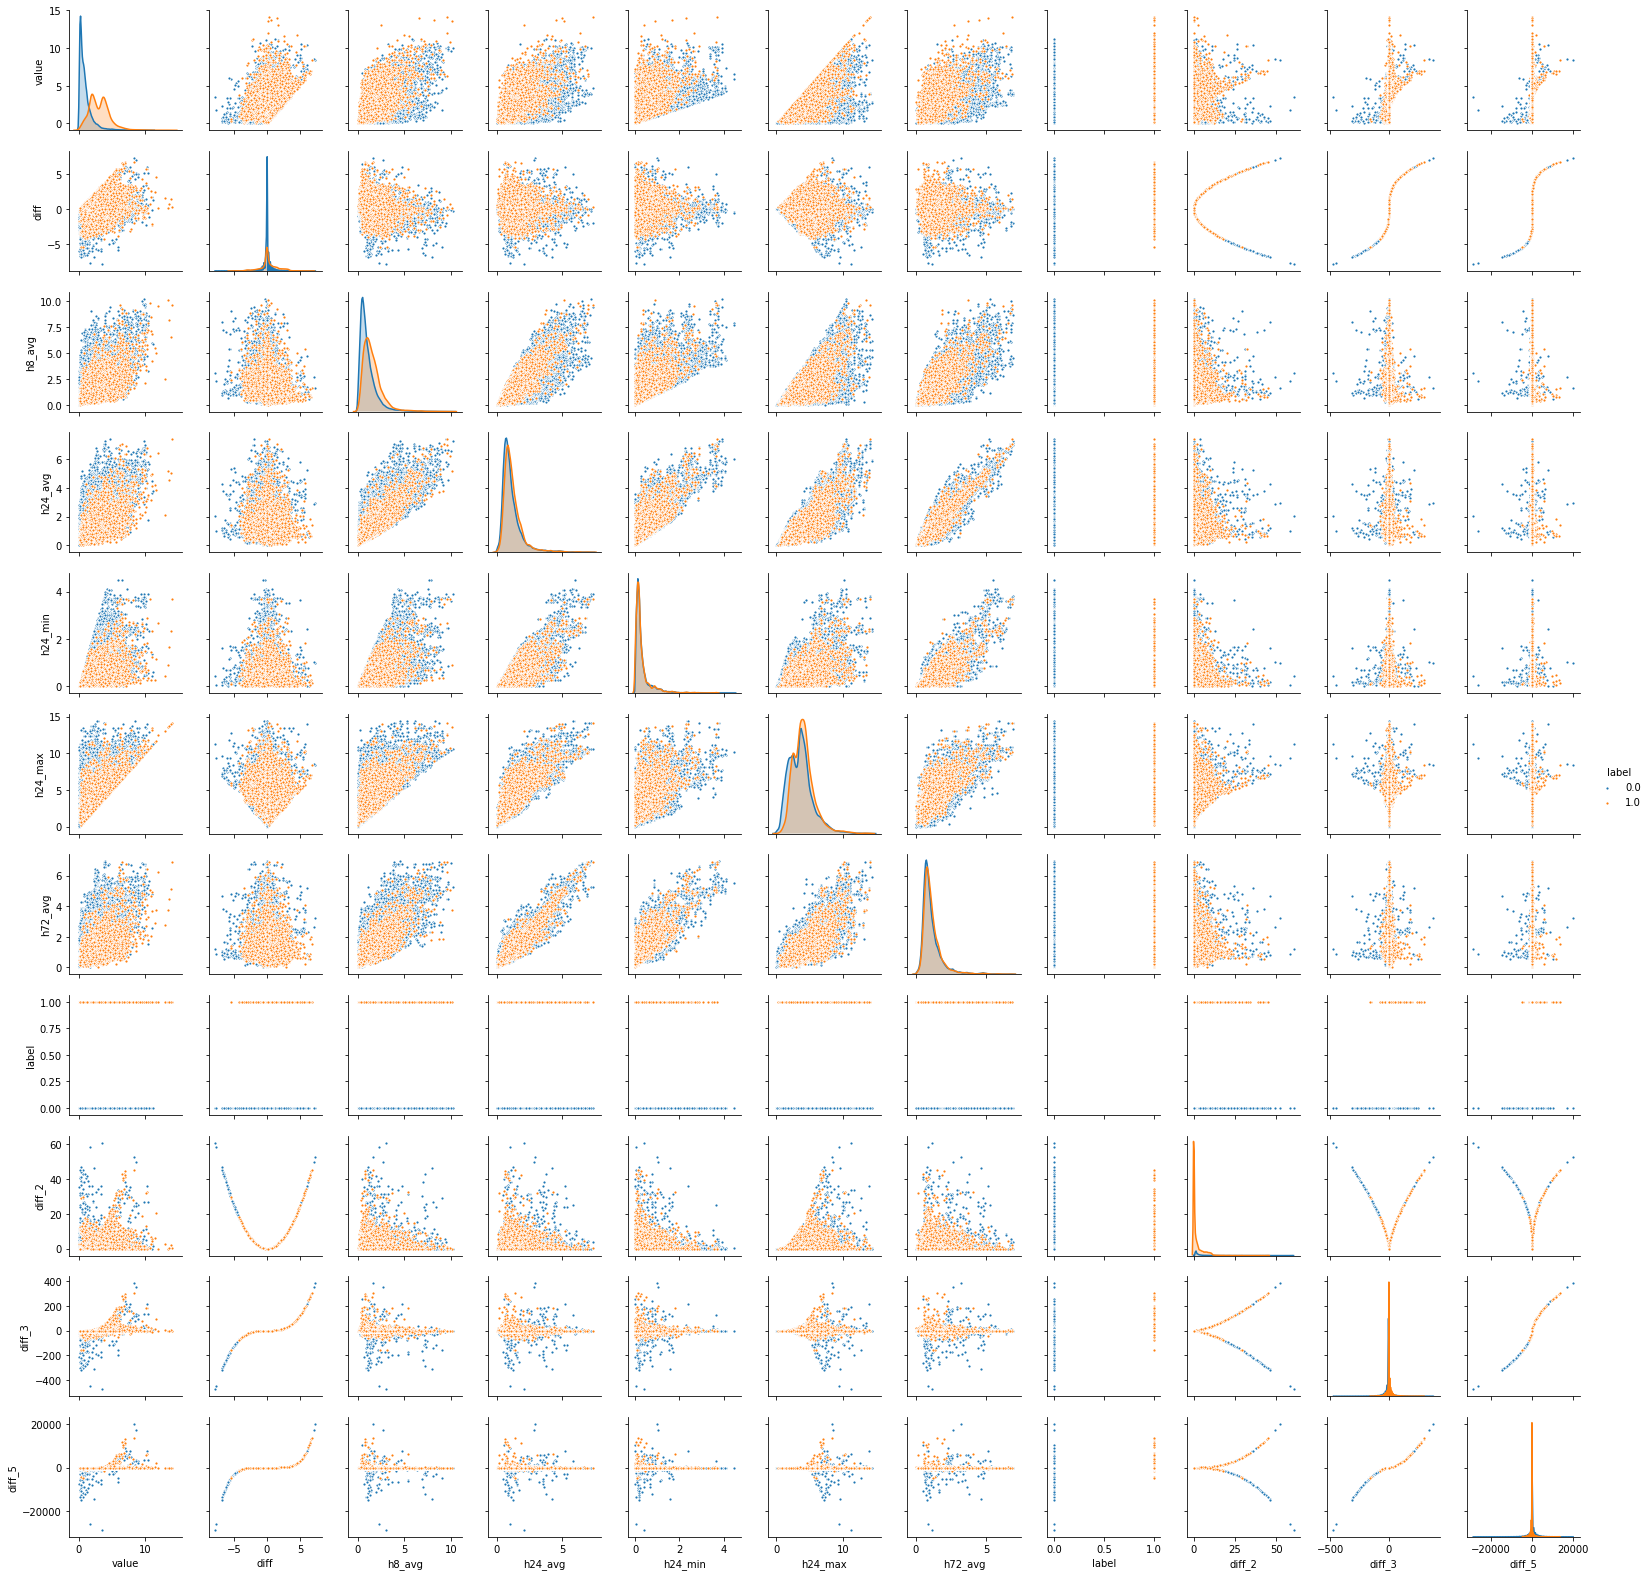

In [6]:
fig = sns.pairplot(features_reduced, height=2, hue='label', markers='.');
fig.savefig(fig_path / "feature_pair_plots_all.png")

In [7]:
features_reduced = features.sample(100000)

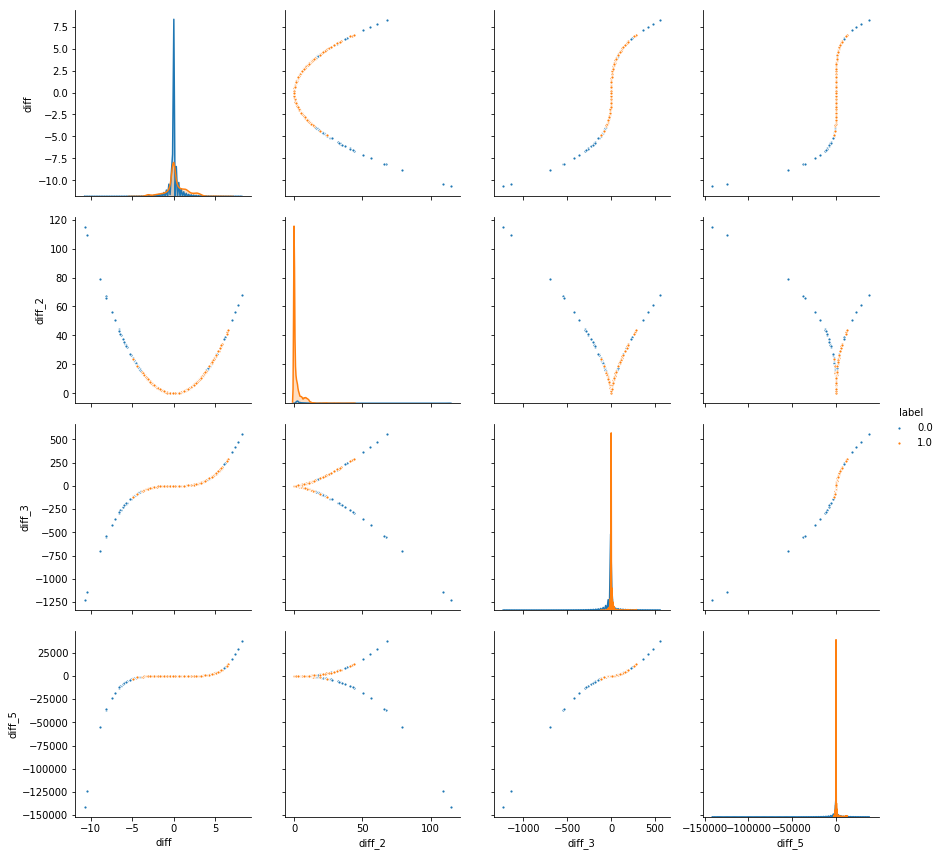

In [8]:
# ['value', 'diff', 'h8_avg', 'h24_avg', 'h24_min', 'h24_max', 'h72_avg','label', 'diff_2', 'diff_3']
fig = sns.pairplot(features_reduced, 
                   height=3, hue='label', markers='.',
                   vars=['diff', 'diff_2', 'diff_3', 'diff_5']);
fig.savefig(fig_path / "feature_pairplt_diffs1.png")

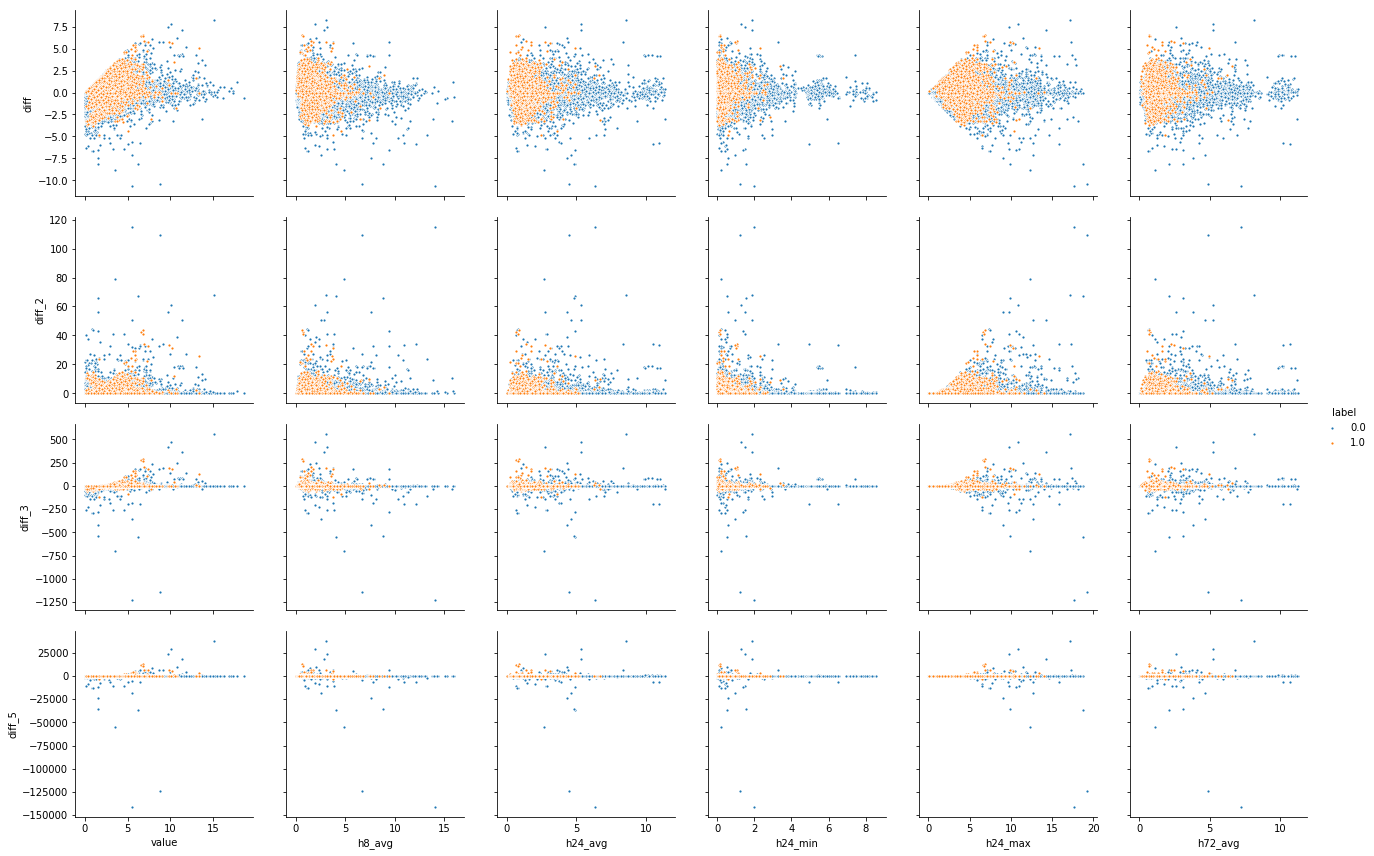

In [9]:
# ['value', 'diff', 'h8_avg', 'h24_avg', 'h24_min', 'h24_max', 'h72_avg','label', 'diff_2', 'diff_3']
fig = sns.pairplot(features_reduced, 
                   height=3, hue='label', markers='.',
                   y_vars=['diff', 'diff_2', 'diff_3', 'diff_5'],
                   x_vars=['value', 'h8_avg', 'h24_avg', 'h24_min', 'h24_max', 'h72_avg']);
fig.savefig(fig_path / "feature_pairplt_diffs2.png")